<b>Assignment 5<b>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [5]:
# Load the dataset
file_path = 'Air_Quality.csv'
air_quality_data = pd.read_csv(file_path)

In [6]:
# Display the first few rows to understand the structure of the dataset
air_quality_data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [7]:
 air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [8]:
# View basic statistical summary of the dataset
print(air_quality_data.describe())

           Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   16218.000000  16218.000000  1.621800e+04  16218.000000      0.0
mean   372730.417746    427.803613  6.097103e+05     19.975917      NaN
std    215507.613560    110.921411  7.893388e+06     21.322349      NaN
min    121644.000000    365.000000  1.000000e+00      0.000000      NaN
25%    173211.250000    365.000000  2.020000e+02      9.050000      NaN
50%    325262.500000    375.000000  3.030000e+02     15.300000      NaN
75%    605270.750000    386.000000  4.040000e+02     26.037500      NaN
max    799868.000000    661.000000  1.051061e+08    424.700000      NaN


In [9]:
# Check for any missing values in the dataset
print(air_quality_data.isnull().sum())

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64


In [10]:
# Drop the 'Message' column since it's empty
air_quality_data_cleaned = air_quality_data.drop(columns=['Message'])

In [11]:
air_quality_data_cleaned.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83


In [12]:
# Convert 'Start_Date' to datetime format
air_quality_data_cleaned['Start_Date'] = pd.to_datetime(air_quality_data_cleaned['Start_Date'], errors='coerce')

In [13]:
air_quality_data_cleaned.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,2010-12-01,25.30
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,2008-12-01,26.93
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,2015-01-01,19.09
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,2015-01-01,19.76
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,2008-12-01,22.83


In [14]:
# Step 2: Data Transformation
# Normalize column names to lowercase and replace spaces with underscores
air_quality_data_cleaned.columns = air_quality_data_cleaned.columns.str.lower().str.replace(' ', '_')

In [15]:
air_quality_data_cleaned.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,2010-12-01,25.30
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,2008-12-01,26.93
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,2015-01-01,19.09
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,2015-01-01,19.76
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,2008-12-01,22.83


In [16]:
# Extract the year from 'time_period' and add it as a new column
air_quality_data_cleaned['year'] = air_quality_data_cleaned['time_period'].str.extract(r'(\d{4})').astype(float)

In [17]:
air_quality_data_cleaned.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,year
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,2010-12-01,25.30,2011.0
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,2008-12-01,26.93,2009.0
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,2015-01-01,19.09,2015.0
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,2015-01-01,19.76,2015.0
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,2008-12-01,22.83,2009.0


In [18]:
# Standardize the case format for categorical columns
air_quality_data_cleaned['geo_type_name'] = air_quality_data_cleaned['geo_type_name'].str.title()

In [19]:
air_quality_data_cleaned['measure'] = air_quality_data_cleaned['measure'].str.capitalize()

In [20]:
air_quality_data_cleaned.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,year
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,Uhf34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,2010-12-01,25.30,2011.0
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,Uhf34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,2008-12-01,26.93,2009.0
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,Uhf34,204,East New York,Annual Average 2015,2015-01-01,19.09,2015.0
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,Uhf34,103,Fordham - Bronx Pk,Annual Average 2015,2015-01-01,19.76,2015.0
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,Uhf34,104,Pelham - Throgs Neck,Annual Average 2009,2008-12-01,22.83,2009.0


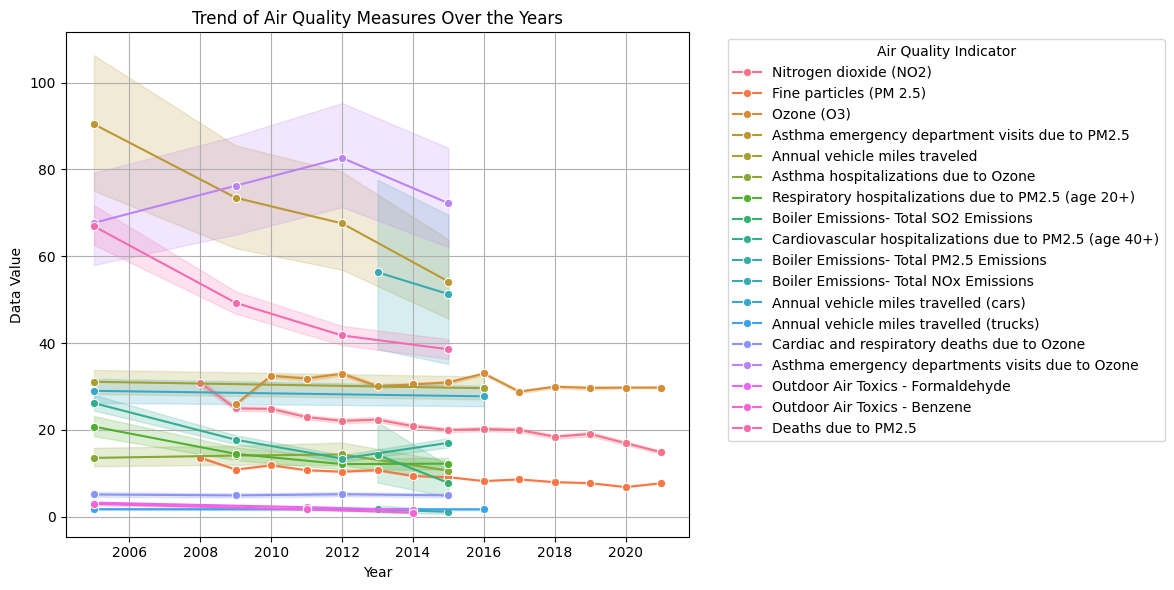

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=air_quality_data_cleaned, x='year', y='data_value', hue='name', marker='o')
plt.title('Trend of Air Quality Measures Over the Years')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.legend(title='Air Quality Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [22]:
result = linregress(air_quality_data_cleaned['year'].dropna(), air_quality_data_cleaned['data_value'].dropna())
print(f"Linear Regression Result: Slope={result.slope:.3f}, Intercept={result.intercept:.3f}, R-squared={result.rvalue**2:.3f}")


Linear Regression Result: Slope=-0.949, Intercept=1931.103, R-squared=0.034
